In [1]:
from preprocessing import (
    preprocess_kjv,
    get_word_types_with_tf_idf,
    get_gospel_top_70_words_dictionary,
)
from extract_relations import (
    get_directed_relations,
    order_directed_relations,
)
from ontology_algorithm import (
    construct_ontology_hierarchy,
    print_hierarchy_tree_from_ontology,
    draw_hierarchy_tree_from_ontology,
)
from topic_modeling import (
    kmeans_tfidf_clustering,
)
import re

## Preprocessing

We will preprocess words from the theology reconsidered text using tf-idf and extract the top n words.

In [2]:
kjv_path = "/home/zhutchens/uncc/research/hierarchical_clustering/data/t_kjv.csv"

# returns pandas dataframe object
kjv_bible_df = preprocess_kjv(
    path_to_kjv=kjv_path,
)

# Get book column unique values.
# kjv_bible_df["book"] returns a Series object, and the unique function returns unique values of the Series object (ndarray or ExtenseionArray)
all_books = kjv_bible_df["book"].unique() # list of all bible books 

# Specify the number of top words to use.
n = 70

books = []
for book in all_books:
    book_df = kjv_bible_df[kjv_bible_df["book"] == book]
    book_text = ""
    for chapter in book_df["chapter"].unique():
        chapter_df = book_df[book_df["chapter"] == chapter]
        book_text += " ".join(chapter_df["text"].values) # variable book text doesnt seem to be used for anything?
    books.append(" ".join(chapter_df["text"].values))

# the preprocessing stage turns the literarture into something DEBRA understands:
# A set of chapters (books in the bible)
# Each chapter consists of a set of sentences (stopwords and punctutation removed)

titles = all_books # list of all books in the KJV bible
chapters = books # for some reason this list only contains the text 

## Perform topic modeling

In [3]:
NUM_TOPICS = 6
clusters, key_terms_per_cluster = kmeans_tfidf_clustering(
    chapters=chapters, 
    num_topics=NUM_TOPICS,
)

CLUSTER #1
Cluster Chapters: [7, 31, 39, 40, 41, 42, 43]
Key Features: ['said', 'unto', 'came', 'jesus', 'disciples', 'said unto', 'sepulchre', 'thou', 'saith unto', 'went', 'thee', 'jonah', 'ye', 'peter', 'risen', 'saith', 'begat', 'boaz', 'sat', 'mary', 'gourd', 'things', 'lord', 'shall', 'saying', 'redeem', 'simon', 'day', 'see', 'dead', 'believed', 'galilee', 'us', 'go', 'angry', 'naomi', 'tell', 'paul', 'shewed', 'behold', 'told', 'come', 'name', 'saw', 'god', 'jesus saith', 'spake', 'die', 'departed', 'mary magdalene']
CLUSTER #2
Cluster Chapters: [2, 20, 22, 25, 26, 27, 28, 29, 30, 36, 37, 38, 58, 60, 65]
Key Features: ['shall', 'lord', 'saith', 'saith lord', 'ye', 'day', 'unto', 'earth', 'come', 'thy', 'hosts', 'lord hosts', 'one', 'upon', 'side', 'shall come', 'holy', 'thousand', 'jerusalem', 'estimation', 'let', 'behold', 'things', 'thy estimation', 'thou', 'return', 'children', 'heavens', 'lord shall', 'tree', 'end', 'border', 'heathen', 'israel', 'book', 'man', 'judah', 'go

## Find top_n_words using tf

In [4]:
# Specify the chapters used in the analysis.
chosen_cluster = 1

chosen_chapters = clusters[chosen_cluster]
chosen_books = [titles[idx] for idx in chosen_chapters]

key_terms = key_terms_per_cluster[chosen_cluster]

print("Chosen chapters ", chosen_chapters)

# Specify the number of top words to use.
n = 50

text_per_chapter = []
for chapter_idx in chosen_chapters:
    text_per_chapter.append(chapters[chapter_idx])
print(len(text_per_chapter))
tf_idf_pre_filtering = get_word_types_with_tf_idf(
    text_per_chapter,
    "tf",
    skip_stopwords=True,
    include_verbs=False,
    include_determiners=False,
    include_pronouns=False,
    include_adverbs=False,
    include_numbers=False,
)

top_n_words = tf_idf_pre_filtering.head(n)["word"].values

# See difference between top words and key terms.
print("Top words: ", top_n_words)
print("Key terms: ", key_terms)
print("Overlap: ", set(top_n_words).intersection(set(key_terms)))
print("Symmetric difference: ", set(top_n_words).symmetric_difference(set(key_terms)))

Chosen chapters  [7, 31, 39, 40, 41, 42, 43]
7


/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


Top words:  ['unto' 'jesus' 'lord' 'shall' 'things' 'day' 'god' 'sepulchre'
 'disciples' 'peter' 'name' 'dead' 'simon' 'great' 'among' 'begat' 'man'
 'boaz' 'people' 'hands' 'jerusalem' 'hand' 'paul' 'mary' 'city'
 'brethren' 'son' 'galilee' 'israel' 'upon' 'third' 'women' 'naomi'
 'jonah' 'simon peter' 'days' 'house' 'jesus saith unto' 'kinsman' 'time'
 'heart' 'father' 'gourd' 'right' 'morning' 'men' 'elders' 'net' 'stone'
 'night']
Key terms:  ['said', 'unto', 'came', 'jesus', 'disciples', 'said unto', 'sepulchre', 'thou', 'saith unto', 'went', 'thee', 'jonah', 'ye', 'peter', 'risen', 'saith', 'begat', 'boaz', 'sat', 'mary', 'gourd', 'things', 'lord', 'shall', 'saying', 'redeem', 'simon', 'day', 'see', 'dead', 'believed', 'galilee', 'us', 'go', 'angry', 'naomi', 'tell', 'paul', 'shewed', 'behold', 'told', 'come', 'name', 'saw', 'god', 'jesus saith', 'spake', 'die', 'departed', 'mary magdalene']
Overlap:  {'naomi', 'jonah', 'gourd', 'paul', 'mary', 'day', 'disciples', 'lord', 'shall'

In [5]:
tf_idf_pre_filtering.head(n)

,word,word_type,tc,tf,dc,idf,tf_idf
0,unto,"{'JJ': 38, 'IN': 34, 'VBP': 3, 'RP': 1}",76,0.017292,7,0.000000,0.000000
2,jesus,"{'NNP': 28, 'PERSON': 26, 'NN': 1, 'ORGANIZATI...",29,0.006598,5,0.336472,0.002220
7,lord,"{'NNP': 25, 'ORGANIZATION': 18, 'PERSON': 2, '...",25,0.005688,7,0.000000,0.000000
8,shall,{'MD': 22},22,0.005006,5,0.336472,0.001684
9,things,{'NNS': 22},22,0.005006,5,0.336472,0.001684
11,day,{'NN': 19},19,0.004323,6,0.154151,0.000666
17,god,"{'NNP': 13, 'ORGANIZATION': 1, 'PERSON': 4, 'N...",14,0.003185,5,0.336472,0.001072
19,sepulchre,{'NN': 12},12,0.002730,3,0.847298,0.002313
20,disciples,{'NNS': 12},12,0.002730,3,0.847298,0.002313
21,peter,"{'NNP': 11, 'PERSON': 8}",11,0.002503,3,0.847298,0.002121


# Extract relations from the corpus

In [13]:
# Create a list of all verses of the chosen books.
all_verses = []
for book in chosen_books:
    book_df = kjv_bible_df[kjv_bible_df["book"] == book]
    for chapter in book_df["chapter"].unique():
        chapter_df = book_df[book_df["chapter"] == chapter]
        for verse in chapter_df["text"].values:
            all_verses.append(verse)

1
2
3
4
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [7]:
import spacy

nlp = spacy.load("en_core_web_lg")
doc_1 = nlp(all_verses[98])
spacy.displacy.render(doc_1, style="dep", jupyter=True)

In [8]:
directed_relations, relations_to_verbs = get_directed_relations(
    top_n_words=top_n_words,
    all_verses=all_verses,
    verbose=False,
)

In [9]:
ordered_directed_relations = order_directed_relations(
    directed_relations=directed_relations,
    tf_idf_pre_filtering=tf_idf_pre_filtering,
    order_by="product",
    include_ordering_wrt_occurences=True,
    verbose=False,
)

## Construct the ontology hierarchy

In [10]:
ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
    ordered_directed_relations=ordered_directed_relations,
)
# print_hierarchy_tree_from_ontology(
#     ontological_hierarchy=ontology_hierarchy,
#     words_with_parents=words_with_parents,
# )

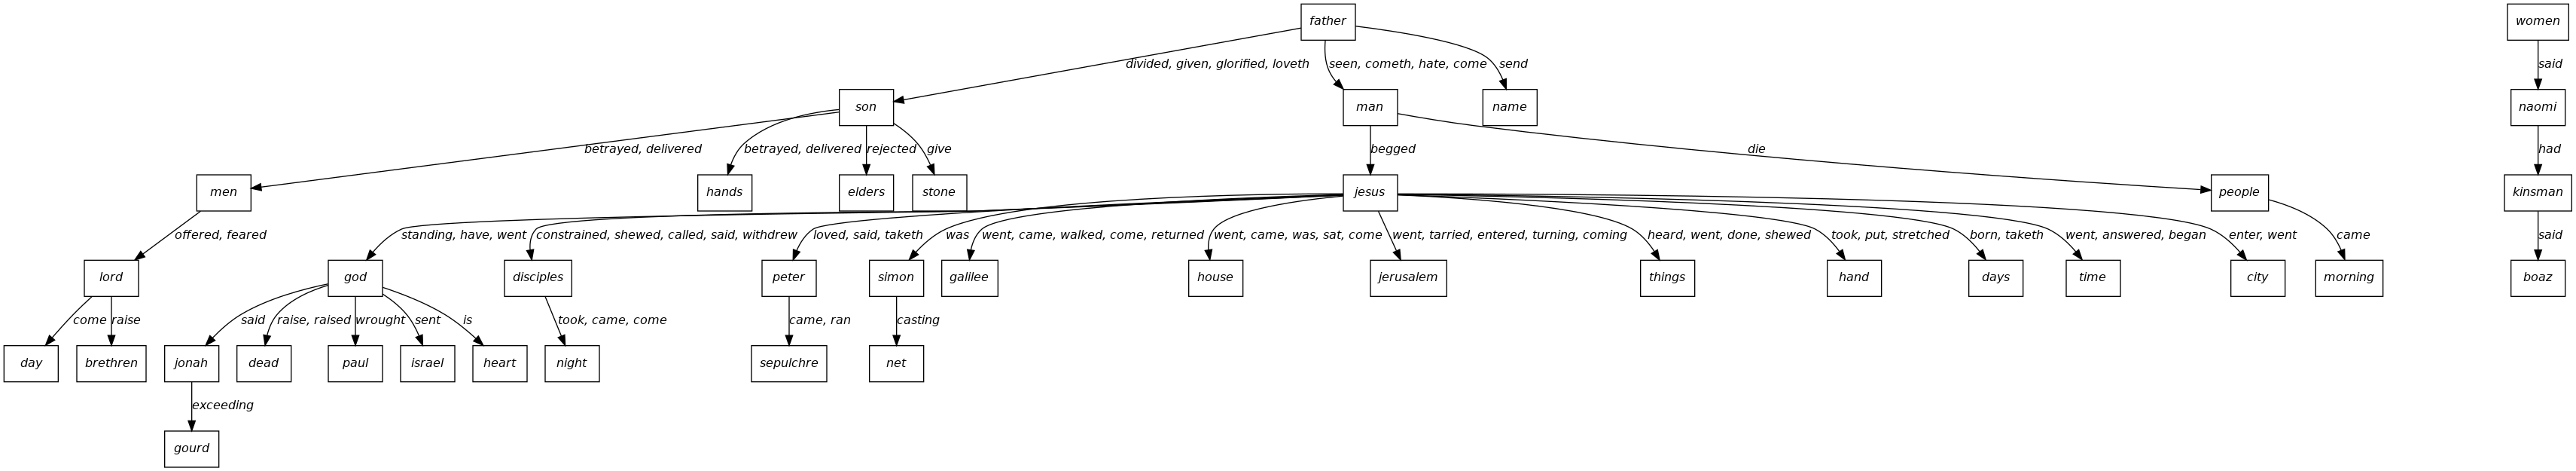

In [11]:
draw_hierarchy_tree_from_ontology(
    ontological_hierarchy=ontology_hierarchy,
    relations_to_verbs=relations_to_verbs,
)

## Run for all parts of the text

Cluster: # 1
Chosen chapters 

Ruth
Jonah
Matthew
Mark
Luke
John
Acts


/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


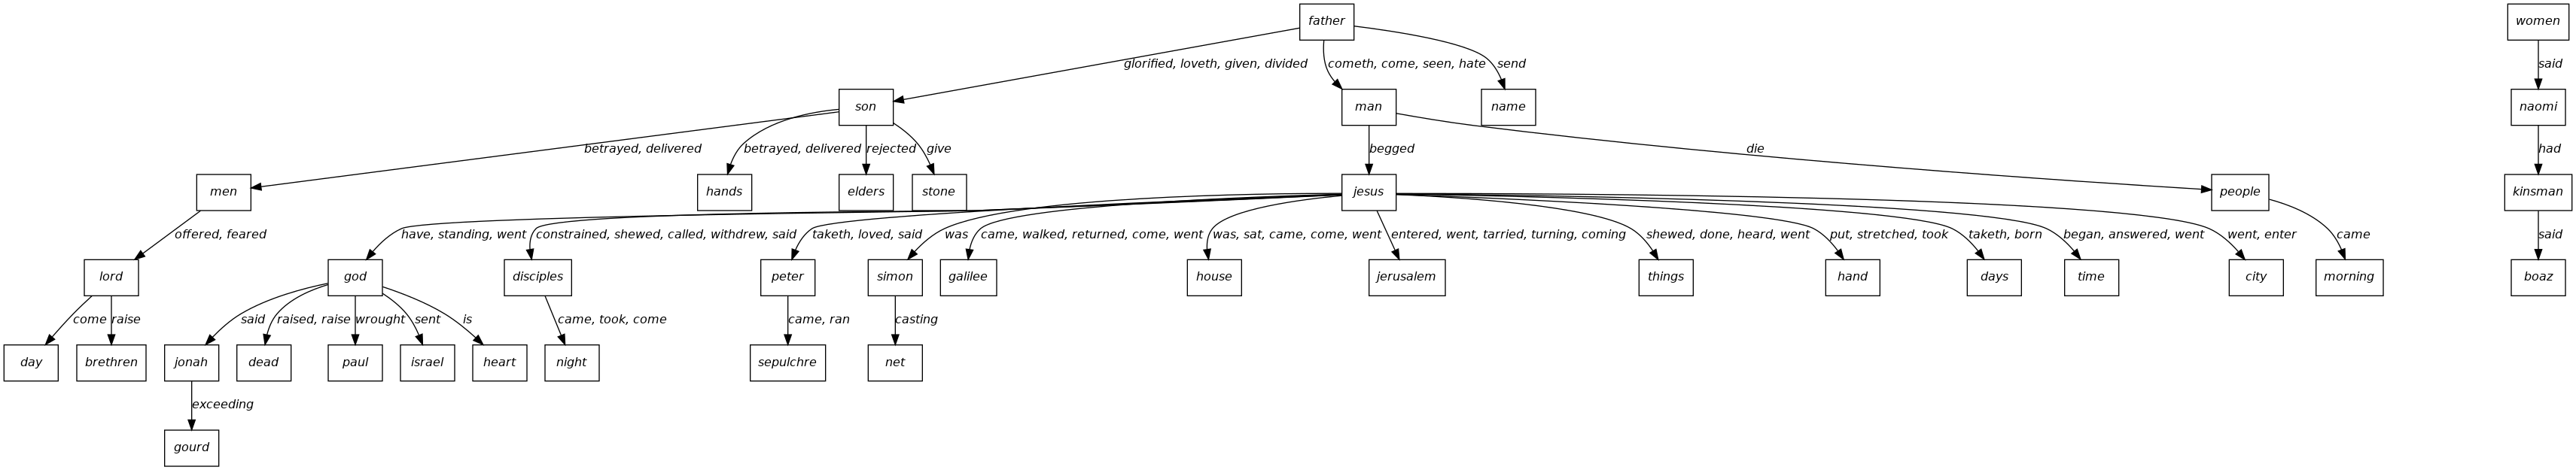

Cluster: # 2
Chosen chapters 

Leviticus
Ecclesiastes
Isaiah
Ezekiel
Daniel
Hosea
Joel
Amos
Obadiah
Haggai
Zechariah
Malachi
James
2 Peter
Revelation


/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


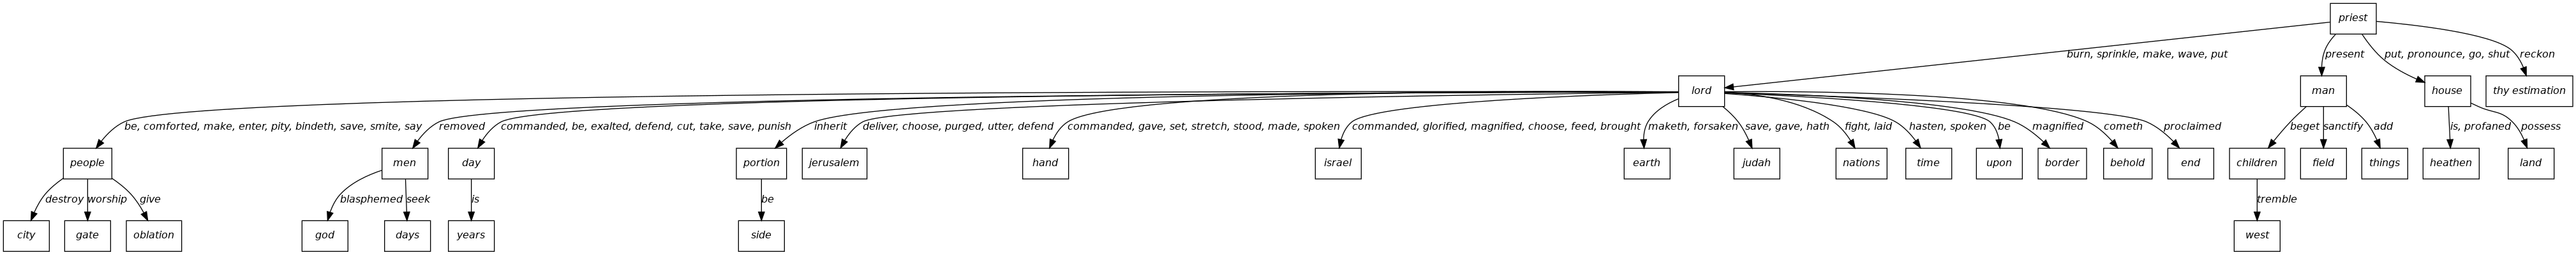

Cluster: # 3
Chosen chapters 

Psalms
Romans
1 Corinthians
2 Corinthians
Galatians
Ephesians
Philippians
Colossians
1 Thessalonians
2 Thessalonians
1 Timothy
Titus
Philemon
Hebrews
1 Peter
1 John
2 John
3 John
Jude


/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


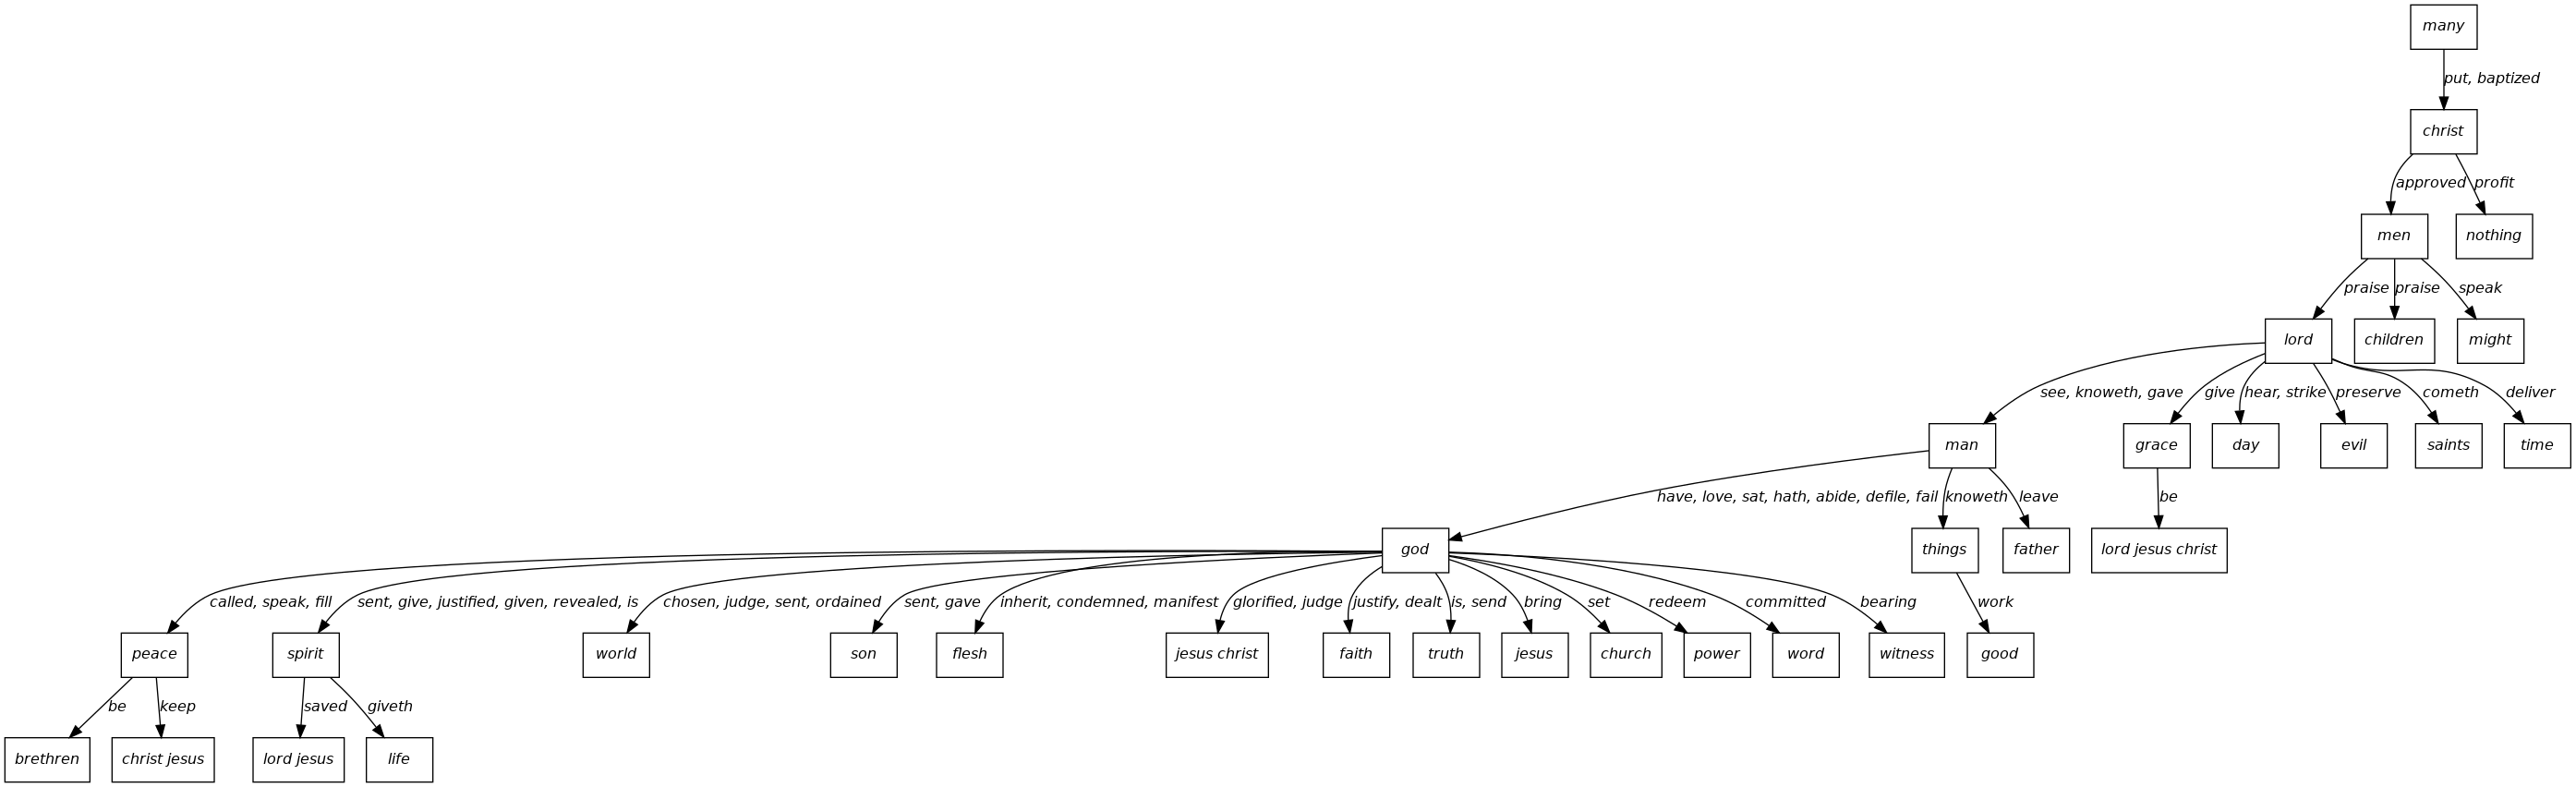

Cluster: # 4
Chosen chapters 

Genesis
Numbers
Deuteronomy
Joshua
Judges
1 Samuel (1 Kings)
2 Samuel (2 Kings)
1 Chronicles
Job


/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


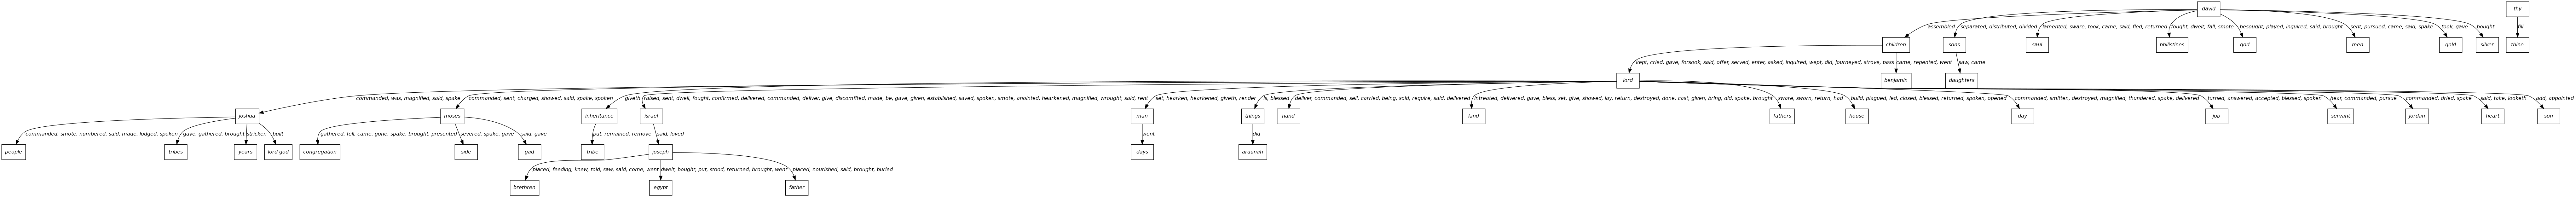

Cluster: # 5
Chosen chapters 

Exodus
1 Kings (3 Kings)
2 Kings (4 Kings)
2 Chronicles
Ezra
Nehemiah
Esther
Jeremiah


/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


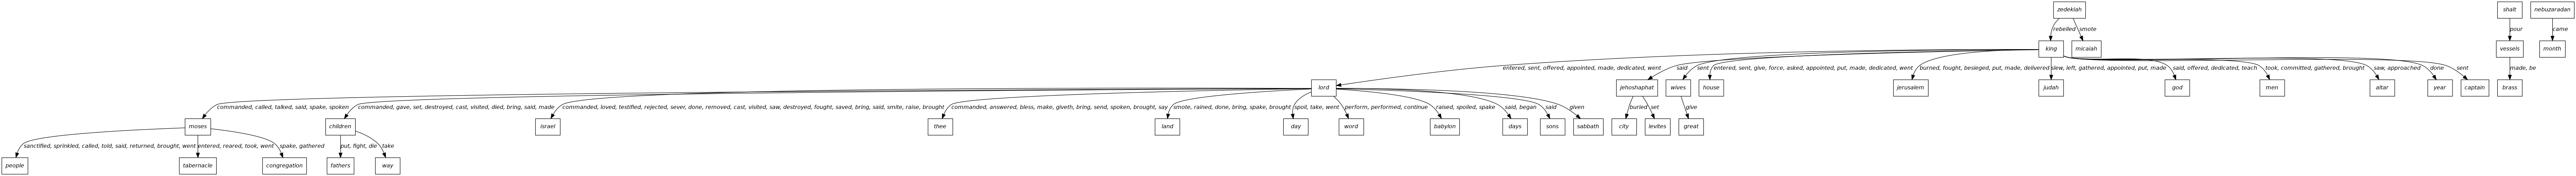

Cluster: # 6
Chosen chapters 

Proverbs
Song of Solomon (Canticles)
Lamentations
Micah
Nahum
Habakkuk
Zephaniah
2 Timothy


/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:159: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  tf = pd.concat([tf, row_df], ignore_index=True)
/home/zhutchens/uncc/research/hierarchical_clustering/concept_hierarchies/preprocessing.py:352: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  idf = pd.concat([idf, row_df], ignore_index=True)


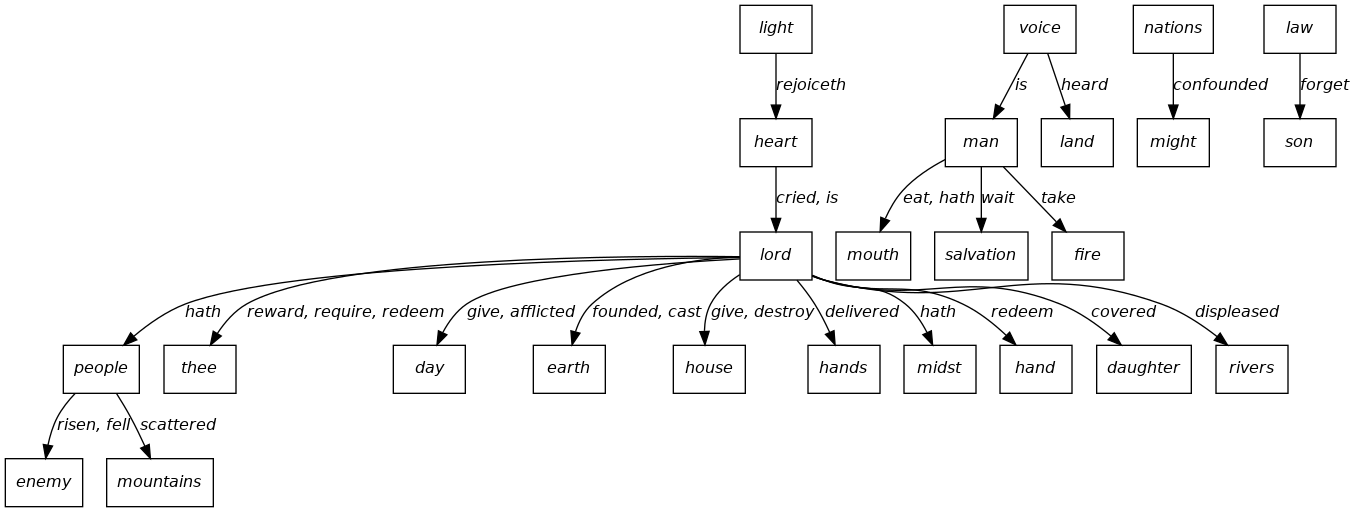

In [12]:
# Specify the chapters used in the analysis.
for cluster in range(1, NUM_TOPICS + 1):
    print("Cluster: #", cluster)
    chosen_chapters = clusters[cluster]

    chosen_books = [titles[i] for i in chosen_chapters]
    print("Chosen chapters \n")
    for title in chosen_books:
        print(title)

    # Specify the number of top words to use.
    n = 50

    text_per_chapter = []
    for chapter_idx in chosen_chapters:
        text_per_chapter.append(chapters[chapter_idx])

    tf_idf_pre_filtering = get_word_types_with_tf_idf(
        text_per_chapter,
        "tf",
        skip_stopwords=True,
        include_verbs=False,
        include_determiners=False,
        include_pronouns=False,
        include_adverbs=False,
        include_numbers=False,
    )

    top_n_words = tf_idf_pre_filtering.head(n)["word"].values

    # Create a list of all verses of the chosen books.
    all_verses = []
    for book in chosen_books:
        book_df = kjv_bible_df[kjv_bible_df["book"] == book]
        for chapter in book_df["chapter"].unique():
            chapter_df = book_df[book_df["chapter"] == chapter]
            for verse in chapter_df["text"].values:
                all_verses.append(verse)
    directed_relations, relations_to_verbs = get_directed_relations(
        top_n_words=top_n_words,
        all_verses=all_verses,
        verbose=False,
    )
    ordered_directed_relations = order_directed_relations(
        directed_relations=directed_relations,
        tf_idf_pre_filtering=tf_idf_pre_filtering,
        order_by="product",
        include_ordering_wrt_occurences=True,
        verbose=False,
    )
    ontology_hierarchy, words_with_parents = construct_ontology_hierarchy(
        ordered_directed_relations=ordered_directed_relations,
    )
    # print_hierarchy_tree_from_ontology(
    #     ontological_hierarchy=ontology_hierarchy,
    #     words_with_parents=words_with_parents,
    # )
    draw_hierarchy_tree_from_ontology(
        ontological_hierarchy=ontology_hierarchy,
        relations_to_verbs=relations_to_verbs,
    )